## Introduction

This is a starter code demonstrating how to read in the data and begin exploring. The dataset has two sections. One is the `img` folder which consists the image and the another one is the `metadata.sqlite` database which consists of the metadata pertaining to the respective images. I will demonstrate how to access them here.

In [ ]:
from pprint import pprint
import json
import sqlite3

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd

Let's read a random image and its associated metadata: `00242.jpg`

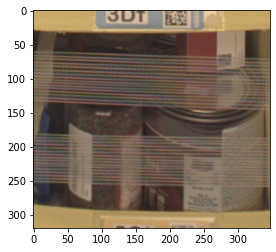

In [2]:
img = mpimg.imread("../input/img/00242.jpg")
plt.imshow(img)

To read the corresponding metadata, we need to query the database. The database has two fields where first column is image id (`img_id`) and the second column is `data` which contains json object. The json object has two main keys. The `BIN_FCSKU_DATA` key returns the data about the image like height, width, weight etc. of the objects in the image while the `EXPECTED_QUANTITY` contains how many items are contained in the bin. We can use the inbuilt json functionality of the SQLite database to get our results.

In [3]:
conn = sqlite3.connect("../input/metadata.sqlite")
df = pd.read_sql_query("""
SELECT json_extract(data, '$.BIN_FCSKU_DATA') AS data,
    json_extract(data, '$.EXPECTED_QUANTITY') AS qnty
FROM metadata
WHERE img_id = '00242';
""", conn)

In [4]:
df

,data,qnty
0,"{""B000LRH9J2"":{""asin"":""B000LRH9J2"",""height"":{""...",6


In [5]:
pprint(json.loads(df.loc[0, "data"]))

{'B000LRH9J2': {'asin': 'B000LRH9J2',
                'height': {'unit': 'IN', 'value': 2.49999999745},
                'length': {'unit': 'IN', 'value': 5.799999994084},
                'name': 'Mint Leaf Crushed (Castella) 3 oz',
                'normalizedName': 'Mint Leaf Crushed (Castella) 3 oz',
                'quantity': 2,
                'weight': {'unit': 'pounds', 'value': 0.3},
                'width': {'unit': 'IN', 'value': 2.699999997246}},
 'B001005KVS': {'asin': 'B001005KVS',
                'height': {'unit': 'IN', 'value': 4.199999995716},
                'length': {'unit': 'IN', 'value': 4.899999995002001},
                'name': 'Absolute Coatings 3775 Last N Last Wood Finish '
                        'Acrylic Satin Clear, 1 quart',
                'normalizedName': 'Absolute Coatings 3775 Last N Last Wood '
                                  'Finish Acrylic Satin Clear, 1 quart',
                'quantity': 2,
                'weight': {'unit': 'pounds', 'value':

To get all the rows, remove the `WHERE` contraint from the query to create the whole dataframe.

In [6]:
df = pd.read_sql_query("""
SELECT json_extract(data, '$.BIN_FCSKU_DATA') AS data,
    json_extract(data, '$.EXPECTED_QUANTITY') AS qnty
FROM metadata;
""", conn)
df.data = df.data.apply(json.loads)

In [7]:
df

,data,qnty
0,"{'B018240DGG': {'asin': 'B018240DGG', 'height'...",3
1,"{'1593859864': {'asin': '1593859864', 'height'...",6
2,"{'B000052Z9F': {'asin': 'B000052Z9F', 'height'...",9
3,"{'B00065PQTO': {'asin': 'B00065PQTO', 'height'...",5
4,"{'B00H3L51XA': {'asin': 'B00H3L51XA', 'height'...",8
...,...,...
49995,"{'0205616887': {'asin': '0205616887', 'height'...",5
49996,"{'B00F4O8O3C': {'asin': 'B00F4O8O3C', 'height'...",4
49997,"{'0783237367': {'asin': '0783237367', 'height'...",12
49998,"{'B004I2F49I': {'asin': 'B004I2F49I', 'height'...",5


## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!